In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [19]:
# open the tsv file
#data=pd.read_csv('download.tsv', sep='\t')

# save as csv
#data.to_csv('download.csv', index=False)

#This was only needed once to convert the tsv to csv

In [20]:
data=pd.read_csv('download.csv')

data['datetime'] = pd.to_datetime(data['datetime'])

print(data.head())

  agency_cd       id            datetime timezone  discharge  \
0      USGS  8393610 2007-12-15 00:00:00      MST       6.18   
1      USGS  8393610 2007-12-15 00:15:00      MST       6.18   
2      USGS  8393610 2007-12-15 00:30:00      MST       6.17   
3      USGS  8393610 2007-12-15 00:45:00      MST       6.17   
4      USGS  8393610 2007-12-15 01:00:00      MST       6.17   

  discharge_quality  gage_height gage_height_quality  
0                 A         18.4                   A  
1                 A         18.4                   A  
2                 A         17.6                   A  
3                 A         17.6                   A  
4                 A         17.6                   A  


<Axes: xlabel='datetime'>

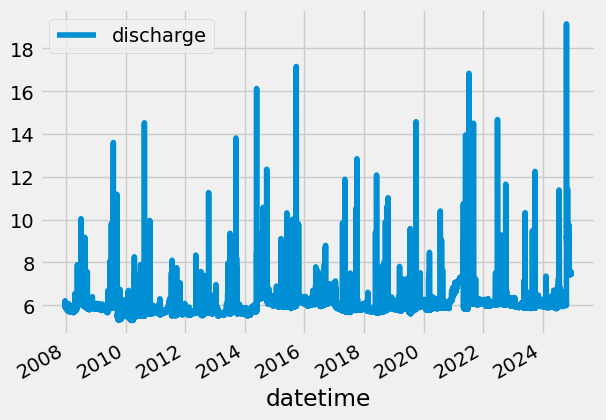

In [21]:
data.plot(x='datetime', y='discharge')

In [22]:
data['year']=data['datetime'].dt.year

data.head()

,agency_cd,id,datetime,timezone,discharge,discharge_quality,gage_height,gage_height_quality,year
0,USGS,8393610,2007-12-15 00:00:00,MST,6.18,A,18.4,A,2007
1,USGS,8393610,2007-12-15 00:15:00,MST,6.18,A,18.4,A,2007
2,USGS,8393610,2007-12-15 00:30:00,MST,6.17,A,17.6,A,2007
3,USGS,8393610,2007-12-15 00:45:00,MST,6.17,A,17.6,A,2007
4,USGS,8393610,2007-12-15 01:00:00,MST,6.17,A,17.6,A,2007


In [23]:
data.groupby(['year']).mean(numeric_only=True)

,id,discharge,gage_height
year,,,
2007,8393610.0,5.993364,10.010049
2008,8393610.0,6.009401,11.217825
2009,8393610.0,5.834626,4.893971
2010,8393610.0,5.718499,12.432839
2011,8393610.0,5.704205,4.640153
2012,8393610.0,5.721392,3.706222
2013,8393610.0,5.763560,10.319909
2014,8393610.0,6.095454,6.434616
2015,8393610.0,6.096765,6.146795


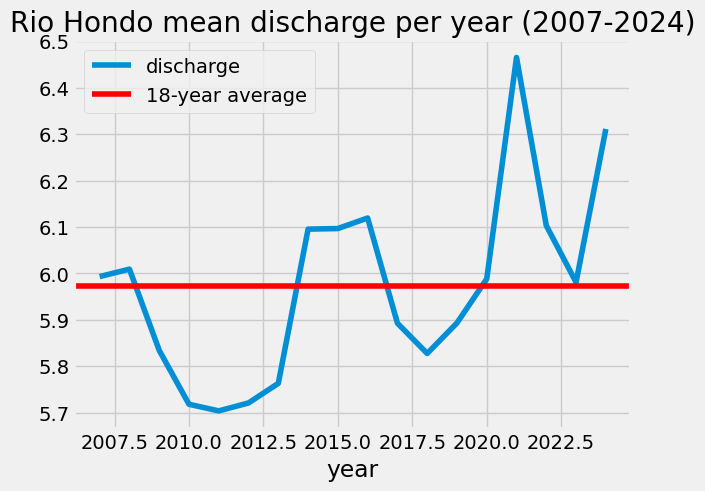

In [26]:
means = data.groupby(['year']).mean(numeric_only=True)
mean_discharge = means['discharge']
overall_mean = mean_discharge.mean()
mean_discharge.plot()
plt.axhline(y=overall_mean, color='red', label='18-year average')
plt.title("Rio Hondo mean discharge per year (2007-2024)")
plt.plot(2024, mean_discharge[2024])
plt.legend()

In [27]:
data['year']

0         2007
1         2007
2         2007
3         2007
4         2007
          ... 
593159    2024
593160    2024
593161    2024
593162    2024
593163    2024
Name: year, Length: 593164, dtype: int32

In [28]:
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['day_of_year'] = data['datetime'].dt.dayofyear

In [29]:
year_2021 = data[data['year'] == 2021]
year_2022 = data[data['year'] == 2022]
year_2023 = data[data['year'] == 2023]
year_2024 = data[data['year'] == 2024]

In [30]:
year_2021

,agency_cd,id,datetime,timezone,discharge,discharge_quality,gage_height,gage_height_quality,year,month,day,day_of_year
456312,USGS,8393610,2021-01-01 00:00:00,MST,6.69,A,6.34,A,2021,1,1,1
456313,USGS,8393610,2021-01-01 00:15:00,MST,6.69,A,6.34,A,2021,1,1,1
456314,USGS,8393610,2021-01-01 00:30:00,MST,6.67,A,5.96,A,2021,1,1,1
456315,USGS,8393610,2021-01-01 00:45:00,MST,6.66,A,5.78,A,2021,1,1,1
456316,USGS,8393610,2021-01-01 01:00:00,MST,6.65,A,5.60,A,2021,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
490643,USGS,8393610,2021-12-31 22:45:00,MST,6.20,A,6.41,A,2021,12,31,365
490644,USGS,8393610,2021-12-31 23:00:00,MST,6.20,A,6.41,A,2021,12,31,365
490645,USGS,8393610,2021-12-31 23:15:00,MST,6.20,A,6.41,A,2021,12,31,365
490646,USGS,8393610,2021-12-31 23:30:00,MST,6.20,A,6.41,A,2021,12,31,365


In [31]:
gage_height_2021 = year_2021[['day_of_year', 'gage_height']]
gage_height_2022 = year_2022[['day_of_year', 'gage_height']]
gage_height_2023 = year_2023[['day_of_year', 'gage_height']]
gage_height_2024 = year_2024[['day_of_year', 'gage_height']]

In [33]:
discharge_2021 = year_2021[['day_of_year', 'discharge']]
discharge_2022 = year_2022[['day_of_year', 'discharge']]
discharge_2023 = year_2023[['day_of_year', 'discharge']]
discharge_3_year = discharge_2021.merge(discharge_2022, on='day_of_year').merge(discharge_2023, on='day_of_year')
discharge_3_year.columns = ['day_of_year', 'discharge_2021', 'discharge_2022', 'discharge_2023']

Text(0.5, 0, 'Day of the year')

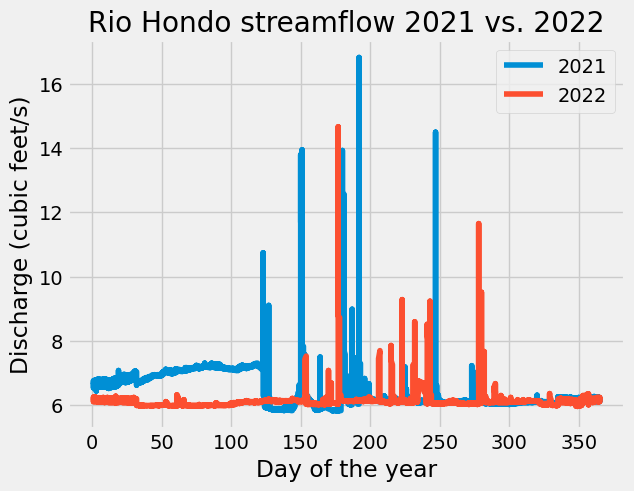

In [34]:
fig, ax = plt.subplots()
ax.plot(discharge_2021['day_of_year'], discharge_2021['discharge'], label='2021')
ax.plot(discharge_2022['day_of_year'], discharge_2022['discharge'], label='2022')
plt.legend()
plt.title('Rio Hondo streamflow 2021 vs. 2022')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Day of the year')